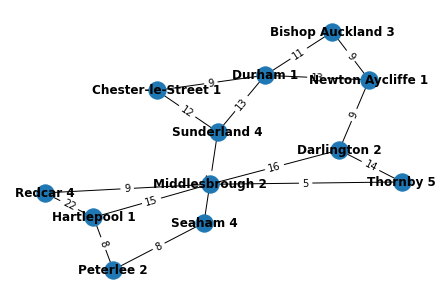

Source Location: Sunderland
Destination: Middlesbrough
Sunderland
Seaham
Peterlee
Hartlepool
Chester-le-Street
Durham
Bishop Auckland
Newton Aycliffe
Darlington
Thornby
Middlesbrough


In [1]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
G = nx.Graph()

E = [('Sunderland 4','Chester-le-Street 1',12),
     ('Sunderland 4','Durham 1',13),
     ('Sunderland 4','Seaham 4',7),
     ('Chester-le-Street 1','Sunderland 4',12),
     ('Chester-le-Street 1','Durham 1',9),
     ('Durham 1','Chester-le-Street 1',9),
     ('Durham 1','Sunderland 4',13),
     ('Durham 1','Bishop Auckland 3',13),
     ('Durham 1','Newton Aycliffe 1',13),
     ('Seaham 4','Sunderland 4',7),
     ('Seaham 4','Peterlee 2',8),
     ('Bishop Auckland 3','Durham 1',11),
     ('Bishop Auckland 3','Newton Aycliffe 1',9),
     ('Peterlee 2','Seaham 4',8),
     ('Peterlee 2','Hartlepool 1',8),
     ('Newton Aycliffe 1','Durham 1',13),
     ('Newton Aycliffe 1','Bishop Auckland 3',9),
     ('Newton Aycliffe 1','Darlington 2',9),
     ('Hartlepool 1','Peterlee 2',8),
     ('Hartlepool 1','Middlesbrough 2',15),
     ('Hartlepool 1','Redcar 4',22),
     ('Darlington 2','Newton Aycliffe 1',9),
     ('Darlington 2','Middlesbrough 2',16),
     ('Darlington 2','Thornby 5',14),
     ('Middlesbrough 2','Hartlepool 1',15),
     ('Middlesbrough 2','Darlington 2',16),
     ('Middlesbrough 2','Thornby 5',5),
     ('Middlesbrough 2','Redcar 4',9),
     ('Redcar 4','Middlesbrough 2',9),
     ('Redcar 4','Hartlepool 1',22),
     ('Thornby 5','Middlesbrough 2',5),
     ('Thornby 5','Darlington 2',14)]

heuristic = {'Sunderland': 4, 'Chester-le-Street': 1, 'Durham': 1, 'Seaham': 4 , 'Bishop Auckland': 3, 
              'Peterlee': 2, 'Newton Aycliffe': 1, 'Hartlepool': 1, 'Darlington': 2, 
              'Middlesbrough': 2, 'Redcar': 4, 'Thornby': 5}
   

G.add_weighted_edges_from(E)
pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

graph= {
    "Sunderland": [["Chester-le-Street", 12], ["Durham", 13],  ["Seaham", 7]],       
    "Chester-le-Street":[["Durham", 9]],
    "Durham": [["Bishop Auckland", 13],["Newton Aycliffe", 13]],
    "Seaham": [["Peterlee", 8]],
    "Bishop Auckland": [["Newton Aycliffe", 9]],
    "Peterlee": [["Hartlepool", 8]],
    "Newton Aycliffe": [["Darlington", 9]],
    "Hartlepool": [["Middlesbrough", 15], ["Redcar", 22]],
    "Darlington": [["Middlesbrough", 16], ["Thornby", 14]],
    "Middlesbrough":[["Thornby", 5]],
    "Redcar":[["Middlesbrough", 9]],
    "Thornby": [["Middlesbrough", 5], ["Darlington", 14]] 
    
}

def bfs(start, target, graph, queue=[], visited=[]):
    
    if start not in visited:
        print(start)
        visited.append(start)
    queue=queue+[x for x in graph[start] if x[0][0] not in visited]
    queue.sort(key=lambda x:x[1])
    
    if queue[0][0]==target:
        print(queue[0][0])
        
    else:
            processing=queue[0]
            queue.remove(processing)
            bfs(processing[0], target, graph, queue, visited)
            
def rungraph():
    
    global start,target
    start = input("Source Location: ")
    
    if start in graph:
        target = input("Destination: ")
        if target in graph:
            bfs(start, target, graph)
        else:
            print("Destination Location does not exists")
            rungraph()
    else:
        print("Source Location does not exists")
        rungraph()          
rungraph()
